## Set up

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm


from sf_permits import config

sns.set_theme()

2024-11-26 17:10:23.887 | INFO     | sf_permits.config:<module>:11 - PROJ_ROOT path is: /home/tomaz/git/Politecnico/Subjects/data-information-quality/sf-permits


In [3]:
df = pd.read_csv(config.RAW_DATASET_PATH)
df

/tmp/ipykernel_40882/3184111430.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(config.RAW_DATASET_PATH)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [4]:
df.iloc[0]

Permit Number                                                                  201505065519
Permit Type                                                                               4
Permit Type Definition                                                         sign - erect
Permit Creation Date                                                             05/06/2015
Block                                                                                  0326
Lot                                                                                     023
Street Number                                                                           140
Street Number Suffix                                                                    NaN
Street Name                                                                           Ellis
Street Suffix                                                                            St
Unit                                                                            

## Pre-processing

### Type conversion

In [6]:
df = df.convert_dtypes()

#### Dates

In [7]:
date_df = df.filter(like="Date")
date_df = date_df.apply(pd.to_datetime, errors="raise", format=r"%m/%d/%Y")
date_df

,Permit Creation Date,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Permit Expiration Date
0,2015-05-06,2017-12-21,2015-05-06,2015-11-09,NaT,2015-11-09,2016-11-03
1,2016-04-19,2017-08-03,2016-04-19,2017-08-03,NaT,2017-08-03,2017-12-03
2,2016-05-27,2017-09-26,2016-05-27,NaT,NaT,NaT,NaT
3,2016-11-07,2017-07-24,2016-11-07,2017-07-18,2017-07-24,2017-07-18,2018-07-13
4,2016-11-28,2017-12-01,2016-11-28,2017-12-01,NaT,2017-11-20,2018-12-01
...,...,...,...,...,...,...,...
198895,2017-12-05,2017-12-05,2017-12-05,2017-12-05,NaT,2017-12-05,NaT
198896,2017-12-05,2017-12-06,2017-12-05,2017-12-06,NaT,2017-12-06,2018-04-06
198897,2017-12-06,2017-12-06,2017-12-06,2017-12-06,NaT,2017-12-06,NaT
198898,2017-12-06,2017-12-06,2017-12-06,2017-12-06,NaT,2017-12-06,NaT


In [8]:
for date_column in date_df:
    df[date_column] = date_df[date_column]
df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,2015-05-06,0326,023,140,<NA>,Ellis,St,...,3,constr type 3,<NA>,<NA>,<NA>,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,2016-04-19,0306,007,440,<NA>,Geary,St,...,3,constr type 3,<NA>,<NA>,<NA>,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,<NA>,Pacific,Av,...,1,constr type 1,1,constr type 1,<NA>,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,<NA>,Pacific,Av,...,5,wood frame (5),5,wood frame (5),<NA>,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,2016-11-28,0342,001,950,<NA>,Market,St,...,3,constr type 3,<NA>,<NA>,<NA>,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,2017-12-05,0113,017A,1228,<NA>,Montgomery,St,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1489337276729
198896,201712055595,8,otc alterations permit,2017-12-05,0271,014,580,<NA>,Bush,St,...,5,wood frame (5),5,wood frame (5),<NA>,<NA>,<NA>,<NA>,<NA>,1489462354993
198897,M863507,8,otc alterations permit,2017-12-06,4318,019,1568,<NA>,Indiana,St,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1489539379952
198898,M863747,8,otc alterations permit,2017-12-06,0298,029,795,<NA>,Sutter,St,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1489608233656


#### Coordinates

In [9]:
coordinates = (
    df["Location"]
    .str.replace("(", "")
    .str.replace(")", "")
    .str.split(",", expand=True)
    .dropna()
)
coordinates

,0,1
0,37.785719256680785,-122.40852313194863
1,37.78733980600732,-122.41063199757738
2,37.7946573324287,-122.42232562979227
3,37.79595867909168,-122.41557405519474
4,37.78315261897309,-122.40950883997789
...,...,...
198881,37.80747140583783,-122.41024025753224
198882,37.723206757170836,-122.42763728105176
198883,37.78696971667916,-122.40936701144197
198884,37.77217130976155,-122.42193576313322


In [10]:
location_geoseries = gpd.GeoSeries.from_xy(coordinates[0], coordinates[1])
location_geoseries

0         POINT (37.786 -122.409)
1         POINT (37.787 -122.411)
2         POINT (37.795 -122.422)
3         POINT (37.796 -122.416)
4          POINT (37.783 -122.41)
                   ...           
198881     POINT (37.807 -122.41)
198882    POINT (37.723 -122.428)
198883    POINT (37.787 -122.409)
198884    POINT (37.772 -122.422)
198885     POINT (37.75 -122.488)
Length: 197200, dtype: geometry

<Axes: >

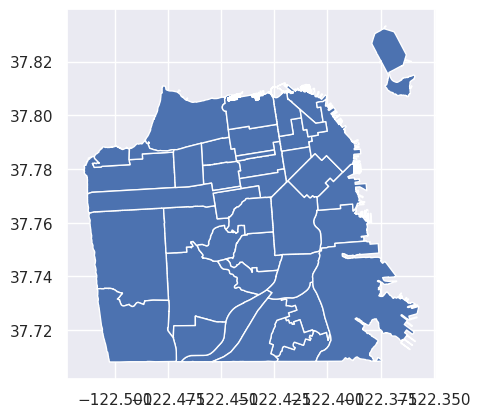

In [11]:
neighbourhood_gdf: gpd.GeoDataFrame = gpd.read_file(config.NEIGHBOURHOOD_SHAPEFILE_PATH)
neighbourhood_gdf.plot()

(323, 6)


<Axes: >

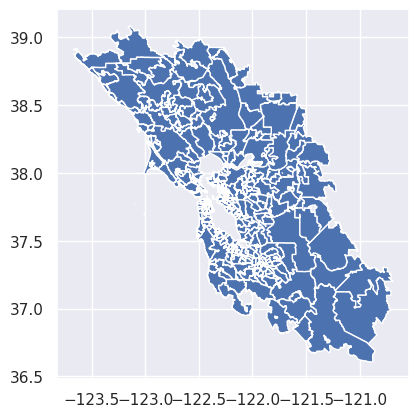

In [12]:
zip_gdf: gpd.GeoDataFrame = gpd.read_file(config.ZIP_CODE_SHAPEFILE_PATH)
print(zip_gdf.shape)
zip_gdf.plot()

<Axes: >

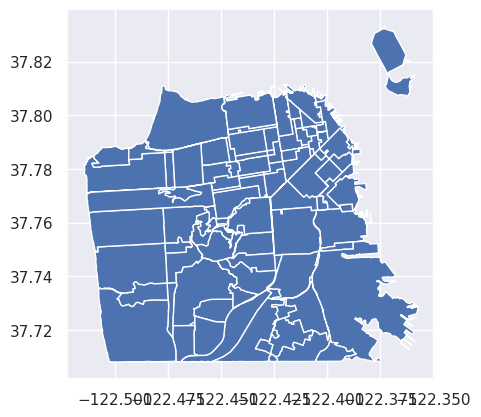

In [13]:
neighbourhood_gdf.overlay(zip_gdf, how="intersection").plot()

In [14]:
zip_gdf.sjoin(neighbourhood_gdf)

,po_name,zip,state,area,length,geometry,index_right,nhood
4,Daly City,94014,CA,0.001567,0.275590,"POLYGON ((-122.47216 37.70311, -122.47216 37.7...",36,Excelsior
4,Daly City,94014,CA,0.001567,0.275590,"POLYGON ((-122.47216 37.70311, -122.47216 37.7...",12,Outer Mission
4,Daly City,94014,CA,0.001567,0.275590,"POLYGON ((-122.47216 37.70311, -122.47216 37.7...",2,Visitacion Valley
5,Daly City,94015,CA,0.001477,0.223021,"POLYGON ((-122.50258 37.70826, -122.50207 37.7...",14,Oceanview/Merced/Ingleside
5,Daly City,94015,CA,0.001477,0.223021,"POLYGON ((-122.50258 37.70826, -122.50207 37.7...",25,Lakeshore
...,...,...,...,...,...,...,...,...
66,San Francisco,94134,CA,0.000686,0.157149,"POLYGON ((-122.43375 37.71312, -122.43371 37.7...",9,Portola
66,San Francisco,94134,CA,0.000686,0.157149,"POLYGON ((-122.43375 37.71312, -122.43371 37.7...",40,Bayview Hunters Point
68,San Francisco,94143,CA,0.000034,0.038242,"POLYGON ((-122.46149 37.76069, -122.46148 37.7...",29,Inner Sunset
88,San Francisco,94158,CA,0.000145,0.073562,"POLYGON ((-122.40004 37.7705, -122.39988 37.77...",8,Potrero Hill


## Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

### Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

### Uniqueness

  0%|          | 0/43 [00:00<?, ?it/s]

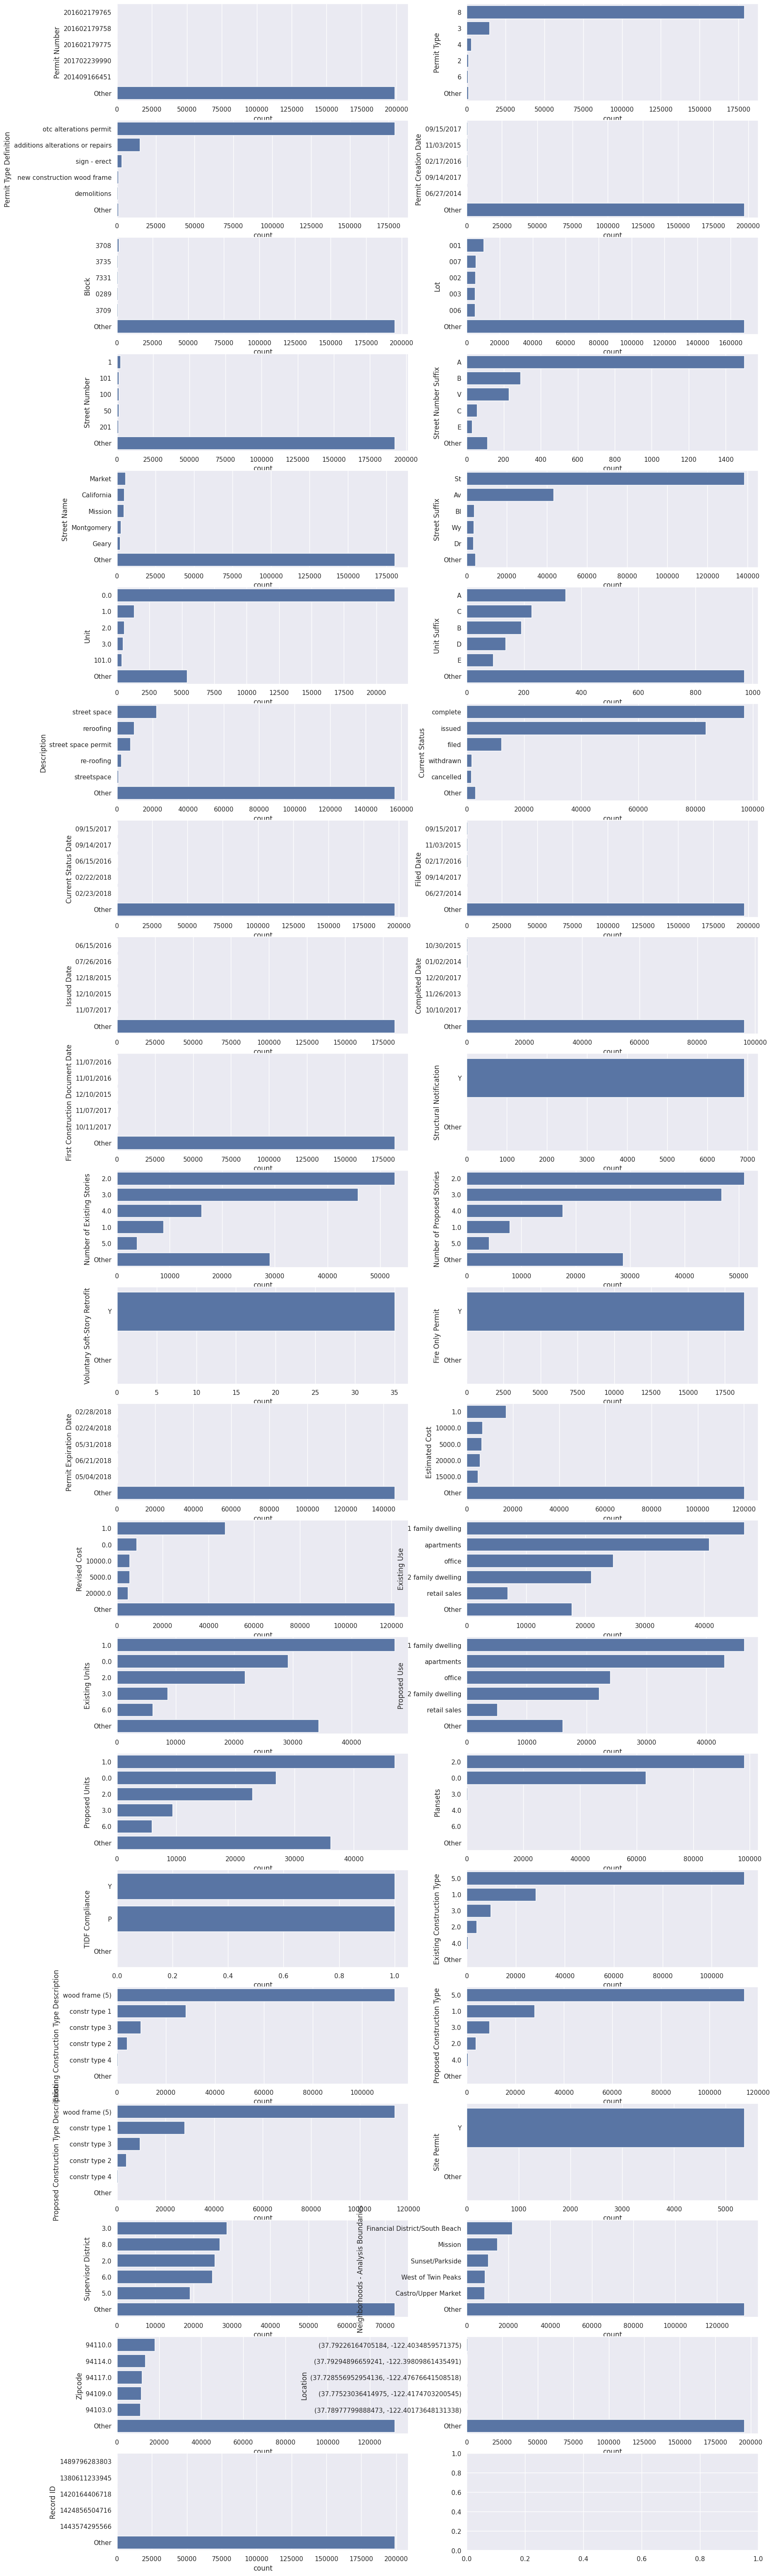

In [10]:
fig, axes = plt.subplots(
    ncols=2,
    nrows=len(df.columns)//2 + 1,
    figsize=(20, 80),
)
axes = axes.ravel()
for ax, column in tqdm(zip(axes, df), total=df.shape[1]):
    counts = df[column].value_counts(sort=True, ascending=False)
    plot_counts = counts.iloc[:5]
    plot_counts["Other"] = counts.iloc[5:].sum()
    sns.barplot(
        plot_counts,
        orient="h",
        ax=ax,
    )

  0%|          | 0/43 [00:00<?, ?it/s]

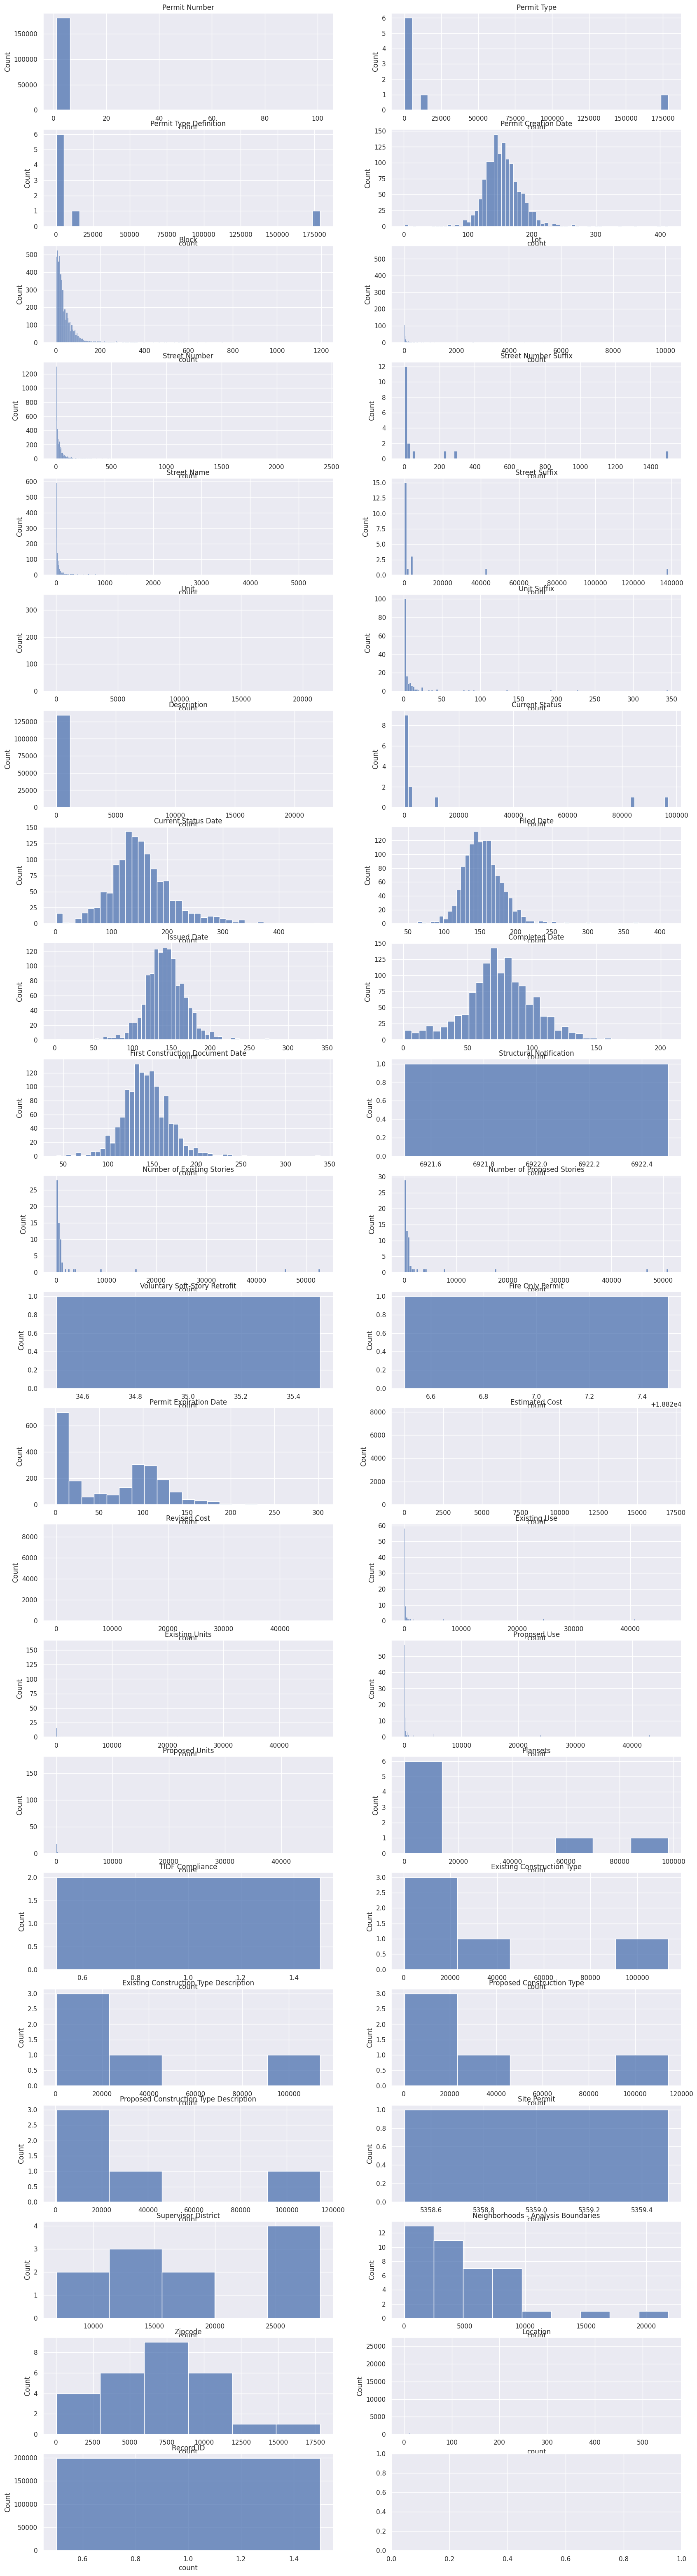

In [13]:
fig, axes = plt.subplots(
    ncols=2,
    nrows=len(df.columns)//2 + 1,
    figsize=(20, 80),
    sharex=False,
    sharey=False,
)
axes = axes.ravel()
for ax, column in tqdm(zip(axes, df), total=df.shape[1]):
    counts = df[column].value_counts()
    sns.histplot(
        counts,
        ax=ax,
    )
    ax.set_title(column)

### Missing values 

<Axes: >

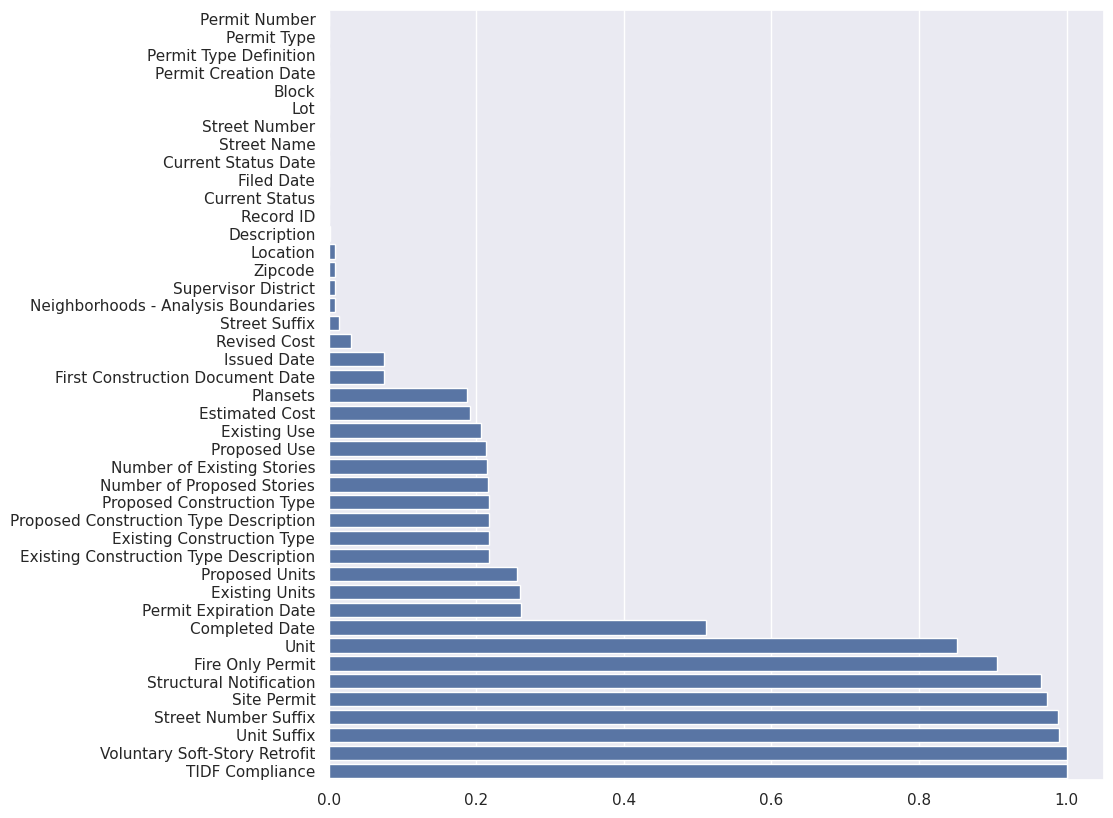

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(
    df.isna().mean().sort_values(),
    orient="h",
    ax=ax
)